In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split


In [5]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.1)


In [2]:
X

array([[-0.49872769,  0.66595549],
       [ 1.74110665, -0.08788336],
       [ 0.83503974, -0.58040961],
       ...,
       [ 0.26089012, -0.23029075],
       [ 0.01273764, -0.2226386 ],
       [-0.28884596,  0.76780645]])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly')
svm_rbf = SVC(kernel='rbf')

# Fit the models
svm_linear.fit(X_train_scaled, y_train)
svm_poly.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_linear = svm_linear.predict(X_test_scaled)
y_pred_poly = svm_poly.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Evaluate and print results
print("Linear Kernel:")
print(classification_report(y_test, y_pred_linear))
print("Accuracy:", accuracy_score(y_test, y_pred_linear))

print("\nPolynomial Kernel:")
print(classification_report(y_test, y_pred_poly))
print("Accuracy:", accuracy_score(y_test, y_pred_poly))

print("\nRBF Kernel:")
print(classification_report(y_test, y_pred_rbf))
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))

Linear Kernel:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       103
           1       0.89      0.89      0.89        97

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

Accuracy: 0.89

Polynomial Kernel:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       103
           1       0.89      0.92      0.90        97

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200

Accuracy: 0.905

RBF Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        97

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00      

In [7]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'Decision Boundary ({model.kernel} kernel)')
    plt.show()

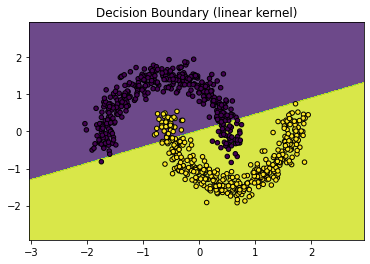

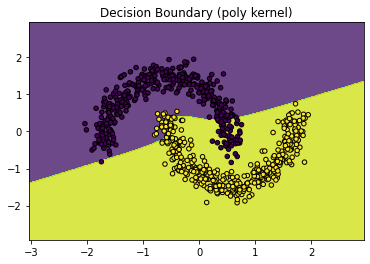

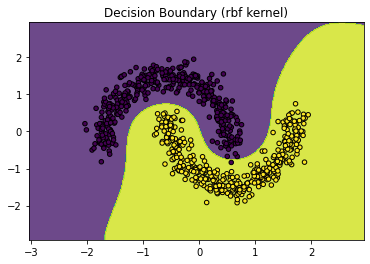

In [8]:
# Plot decision boundaries
plot_decision_boundary(svm_linear, X_train_scaled, y_train)
plot_decision_boundary(svm_poly, X_train_scaled, y_train)
plot_decision_boundary(svm_rbf, X_train_scaled, y_train)

In [9]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for RBF kernel
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# Define the hyperparameter grid for Polynomial kernel
param_grid_poly = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Create grid search objects
grid_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, refit=True, verbose=2)
grid_poly = GridSearchCV(SVC(kernel='poly'), param_grid_poly, refit=True, verbose=2)

# Fit the grid search models
grid_rbf.fit(X_train_scaled, y_train)
grid_poly.fit(X_train_scaled, y_train)

# Get the best parameters and performance
print("Best parameters for RBF kernel:", grid_rbf.best_params_)
print("Best parameters for Polynomial kernel:", grid_poly.best_params_)

# Evaluate performance on test set
y_pred_rbf_tuned = grid_rbf.predict(X_test_scaled)
y_pred_poly_tuned = grid_poly.predict(X_test_scaled)

print("\nTuned RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf_tuned))
print("Tuned Polynomial Kernel Accuracy:", accuracy_score(y_test, y_pred_poly_tuned))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END .................................C=0.1, gamma=scale; total time=   0.0s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.0s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.0s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.0s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.0s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1